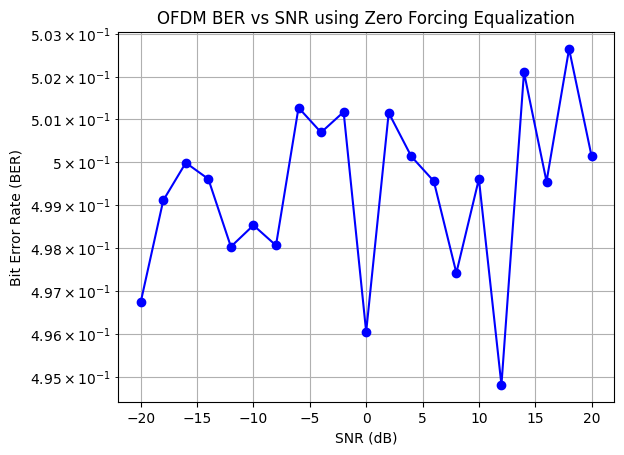

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Parameters
num_bits = 1000  # Number of bits per iteration
num_iterations = 100  # Iterations per SNR
snr_range = np.arange(-20, 22, 2)  # SNR from -20 dB to 20 dB
num_subcarriers = num_bits  # Assuming one subcarrier per bit

# BER storage
ber = []

for snr_db in snr_range:
    bit_errors = 0
    total_bits = 0
    
    for _ in range(num_iterations):
        # Step 1: Generate random bits (0s and 1s)
        bits = np.random.randint(0, 2, num_bits)
        
        # Step 2: BPSK Modulation (0 -> -1, 1 -> 1)
        X = 2 * bits - 1  # Mapping: 0 -> -1, 1 -> 1
        
        # Step 3: IFFT to convert to time domain
        x = np.fft.ifft(X)
        
        # Step 4: Create random channel vector h (between -1 and 1) and AWGN noise
        h = np.random.uniform(-1, 1, num_subcarriers) + 1j * np.random.uniform(-1, 1, num_subcarriers)
        noise_power = 10 ** (-snr_db / 10)  # Convert dB to linear scale
        noise = np.sqrt(noise_power / 2) * (np.random.randn(len(x)) + 1j * np.random.randn(len(x)))
        
        # Convolve signal with channel and add noise
        y = convolve(x, h, mode='same') + noise
        
        # Step 5: FFT to convert back to frequency domain
        Y = np.fft.fft(y)
        H = np.fft.fft(h, num_subcarriers)  # FFT of the channel response
        
        # Step 6: Zero Forcing Equalization
        X_cap = Y / H  # Equalizing the channel
        
        # Step 7: IFFT to convert back to time domain
        x_cap = np.fft.ifft(X_cap)
        
        # Step 8: Decision Rule (BPSK Demodulation)
        bits_cap = (np.real(x_cap) > 0).astype(int)  # Convert -1 -> 0, 1 -> 1
        
        # Step 9: Compute Bit Errors
        bit_errors += np.sum(bits != bits_cap)
        total_bits += num_bits
    
    # Step 10: Compute BER for this SNR value
    ber.append(bit_errors / total_bits)

# Plot BER vs SNR
plt.figure()
plt.semilogy(snr_range, ber, marker='o', linestyle='-', color='b')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("OFDM BER vs SNR using Zero Forcing Equalization")
plt.grid(True, which='both')
plt.show()